<a href="https://colab.research.google.com/github/Marsya127/data-mining-spacex/blob/main/data_mining_spacex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
URL = "https://api.spacexdata.com/v4/launches"

response = requests.get(URL)
response.raise_for_status()

data = response.json()
df = pd.DataFrame(data)

df.head()


,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,...,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id
0,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,...,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",True,False,None,5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,...,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",True,False,None,5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,...,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",True,False,None,5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,...,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",True,False,None,5eb87cdbffd86e000604b32d
4,"{'reused': False, 'recovery_attempt': False, '...",{'patch': {'small': 'https://images2.imgbox.co...,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,...,2009-07-13T03:35:00.000Z,1247456100,2009-07-13T15:35:00+12:00,hour,False,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",True,False,None,5eb87cdcffd86e000604b32e


In [16]:
df = df[[
    "name",
    "success",
    "flight_number",
    "date_utc"
]]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           205 non-null    object
 1   success        186 non-null    object
 2   flight_number  205 non-null    int64 
 3   date_utc       205 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [17]:
df = df.dropna(subset=["success"])
df = df.drop_duplicates()


In [18]:
df["success_label"] = df["success"].astype(int)
df["flight_number"] = df["flight_number"].astype(int)


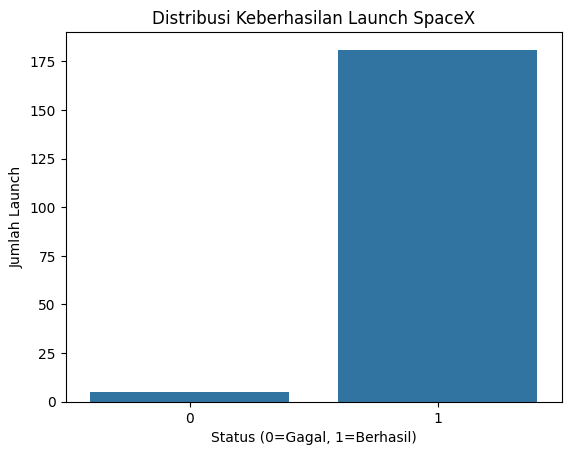

In [19]:
sns.countplot(x="success_label", data=df)
plt.title("Distribusi Keberhasilan Launch SpaceX")
plt.xlabel("Status (0=Gagal, 1=Berhasil)")
plt.ylabel("Jumlah Launch")
plt.show()


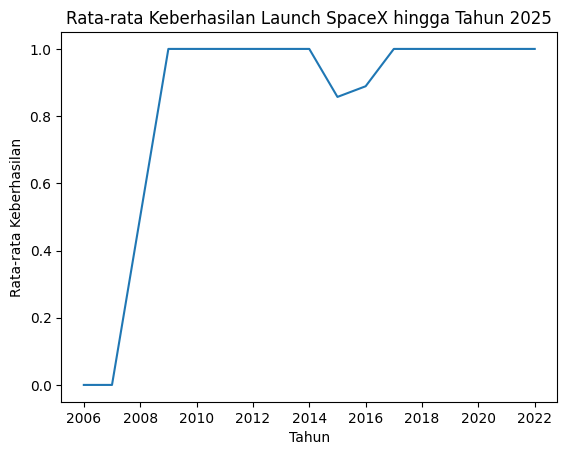

In [26]:
df_yearly = (
    df[df["year"] <= 2025]
    .groupby("year")["success_label"]
    .mean()
    .reset_index()
)

sns.lineplot(x="year", y="success_label", data=df_yearly)
plt.title("Rata-rata Keberhasilan Launch SpaceX hingga Tahun 2025")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Keberhasilan")
plt.show()


In [21]:
X = df[["flight_number"]]
y = df["success_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        37

    accuracy                           0.97        38
   macro avg       0.49      0.50      0.49        38
weighted avg       0.95      0.97      0.96        38



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


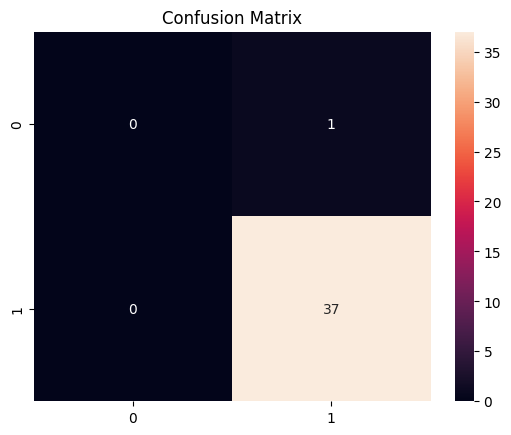

In [24]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [25]:
pd.DataFrame(
    model.coef_[0],
    index=X.columns,
    columns=["Coefficient"]
)


,Coefficient
flight_number,0.113704
